In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing

In [87]:
data = pd.read_csv("data/train.csv")

In [88]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [89]:
dataset = data.copy(deep = True)

In [90]:
dataset.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'], dtype=object)

In [126]:
data_cal = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
target = ['median_house_value']
data_col_total = data_cal + target

In [127]:
print(data_col_total)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


In [92]:
#create synthetic data 
dataset[data_cal].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [93]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


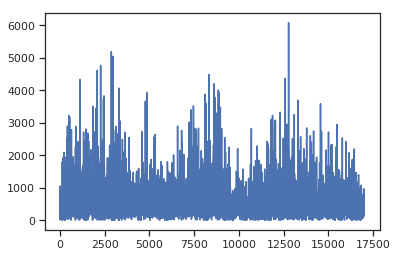

In [94]:
dataset["households"].plot()

In [ ]:
plt.figure(figsize=(16,5))
sns.set(style="whitegrid")
#ax = sns.barplot(x="population", y="median_house_value", data = dataset)
#plt.show()

In [96]:
#create is_rich column 
dataset["is_rich"] = 0
dataset.loc[dataset["median_income"] > 3, "is_rich"] = 1

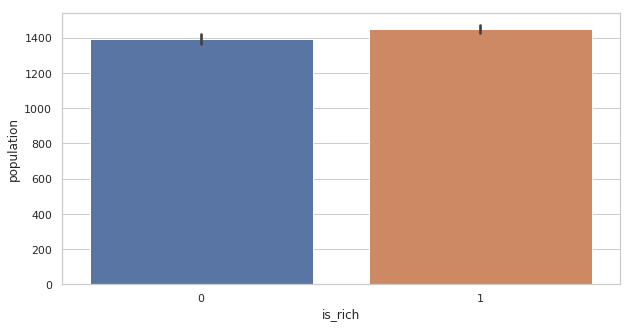

In [97]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x="is_rich", y = "population", data = dataset)

In [98]:
#create quartile 
dataset["cat_income"] = pd.cut(dataset["median_income"],bins=4)
dataset["cat_income_cat"] = pd.cut(dataset["median_income"],bins=4,labels=["pauvre","très pauvre","riche","très riche"])

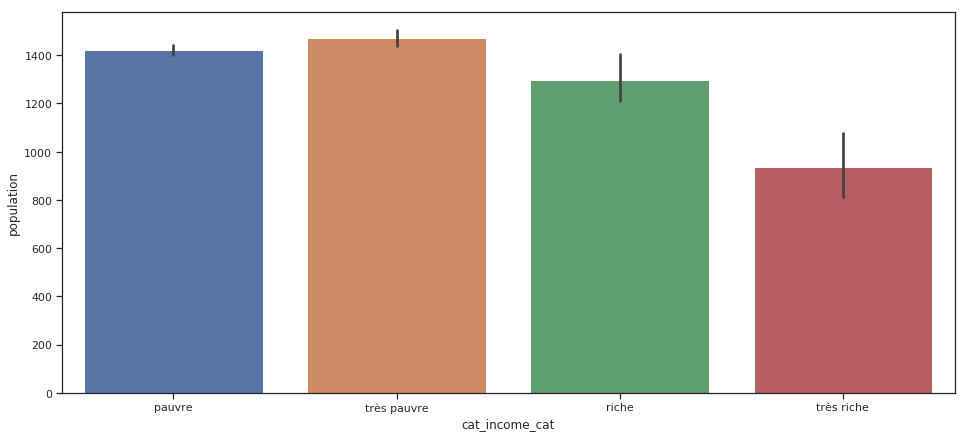

In [99]:
plt.figure(figsize=(16,7))
sns.set(style="ticks")
sns.barplot(x="cat_income_cat",y="population",data=dataset)

In [105]:
dataset.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
is_rich               0
cat_income            0
cat_income_cat        0
dtype: int64

In [128]:
#normalize data 
normalized_dataset = preprocessing.normalize(dataset[data_col_total])

In [130]:
#convert array to frame 
normalized_dataset_fr=pd.DataFrame(normalized_dataset, columns=data_col_total) 
normalized_dataset_fr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-0.001702,0.000509,0.000223,0.083566,0.019105,0.015114,0.007028,0.000022,0.996178
1,-0.001422,0.000427,0.000236,0.095035,0.023616,0.014025,0.005752,0.000023,0.995077
2,-0.001337,0.000393,0.000198,0.008401,0.002030,0.003885,0.001365,0.000019,0.999953
3,-0.001561,0.000458,0.000191,0.020444,0.004590,0.007015,0.003078,0.000043,0.999750
4,-0.001749,0.000512,0.000305,0.022192,0.004976,0.009524,0.003999,0.000029,0.999686


In [131]:
train, validate, test = np.split(normalized_dataset_fr.sample(frac=1), [int(.6*len(normalized_dataset_fr)), int(.8*len(normalized_dataset_fr))])

In [132]:
train_x = train[data_cal]
train_y = train[target]
valid_x = validate[data_cal]
valid_y = validate[target]
test_x = test[data_cal]
test_y = test[target]

print(len(train_x))
print(len(valid_x))
print(len(test_x))

10200
3400
3400


In [134]:
model = Sequential()
model.add(Dense(1,input_dim=train_x.shape[1], activation="linear"))

#comple 
#model.compile(optimizer='sgd', loss="mean_squared_error", metrics=["acc"])
model.compile(optimizer='rmsprop', loss="mean_squared_error", metrics=["mse"])

hist = model.fit(train_x,train_y, validation_data=(valid_x,valid_y),epochs=20, batch_size=8)


Train on 10200 samples, validate on 3400 samples
Epoch 1/20
10200/10200 [==============================] - 2s 182us/step - loss: 0.2549 - mean_squared_error: 0.2549 - val_loss: 3.1871e-04 - val_mean_squared_error: 3.1871e-04
Epoch 2/20
10200/10200 [==============================] - 2s 149us/step - loss: 1.3423e-04 - mean_squared_error: 1.3423e-04 - val_loss: 5.0603e-06 - val_mean_squared_error: 5.0603e-06
Epoch 3/20
10200/10200 [==============================] - 2s 150us/step - loss: 5.8968e-06 - mean_squared_error: 5.8968e-06 - val_loss: 1.1497e-06 - val_mean_squared_error: 1.1497e-06
Epoch 4/20
10200/10200 [==============================] - 2s 149us/step - loss: 4.7834e-06 - mean_squared_error: 4.7834e-06 - val_loss: 7.5436e-07 - val_mean_squared_error: 7.5436e-07
Epoch 5/20
10200/10200 [==============================] - 2s 151us/step - loss: 4.3972e-06 - mean_squared_error: 4.3972e-06 - val_loss: 1.1230e-06 - val_mean_squared_error: 1.1230e-06
Epoch 6/20
10200/10200 [===============

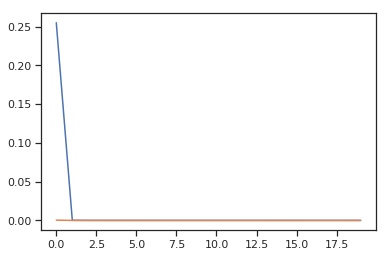

In [136]:
plt.plot(hist.history["mean_squared_error"])
plt.plot(hist.history["val_mean_squared_error"])
plt.show()

In [137]:
model.evaluate(test_x,test_y)

3400/3400 [==============================] - 0s 22us/step


[1.0591352710274376e-06, 1.0591352710274376e-06]

In [138]:
model.predict(test_x)

array([[ 1.00014365],
       [ 1.00098431],
       [ 0.99938351],
       ..., 
       [ 1.00064802],
       [ 1.00034821],
       [ 1.00114524]], dtype=float32)

In [139]:
print(test_y)

       median_house_value
1726             0.999591
5599             0.999959
12336            0.998692
12445            0.999592
532              0.999700
16103            0.999989
16569            0.999369
5273             0.999787
8945             0.999859
10977            0.999881
9944             0.998615
2035             0.999639
16239            0.999843
2057             0.999514
4807             0.999917
15754            0.999935
15494            0.999970
8424             0.999941
11915            0.999973
16632            0.999878
12821            0.999592
2878             0.999993
9389             0.998941
13494            0.999836
13637            0.999951
16685            0.999695
1977             0.999635
14926            0.999901
7332             0.999988
4148             0.999861
...                   ...
5439             0.999983
2512             0.999936
2980             0.999988
10275            0.999828
10785            0.999856
7007             0.999953
4902        

In [55]:
import json
json_string = json.dumps(hist)
print(json_string)

TypeError: Object of type 'History' is not JSON serializable

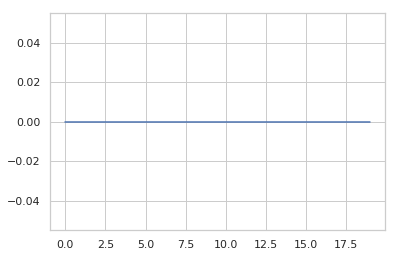

In [51]:
plt.plot(hist.history["acc"])
plt.plot(hist.history[""])